In [2]:
print('The categorical labels are converted into integers.\nFollowing is the mapping - \n')
for label in zip(range(6), raw_data['target_names']):
    print(label)
#5 label Prediction
class_names=[]
for label in zip(range(6), raw_data['target_names']):
    class_names.append(label[1])


The categorical labels are converted into integers.
Following is the mapping - 

(0, 'boxing')
(1, 'handclapping')
(2, 'handwaving')
(3, 'jogging')
(4, 'running')
(5, 'walking')


In [3]:
class_names=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking']
class_names

['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking']

In [4]:
# Displaying the first 5 videos (paths) in the training data along with their labels
# (path of video, class label)
for pair in zip(train_files[:5], train_targets[:5]):
    print(pair)

('/media/glacyx/Projects/Private/Projects/Behaviour Tracking/Working/Data/handclapping/person21_handclapping_d1_uncomp.avi', 1)
('/media/glacyx/Projects/Private/Projects/Behaviour Tracking/Working/Data/jogging/person21_jogging_d3_uncomp.avi', 3)
('/media/glacyx/Projects/Private/Projects/Behaviour Tracking/Working/Data/handwaving/person01_handwaving_d1_uncomp.avi', 2)
('/media/glacyx/Projects/Private/Projects/Behaviour Tracking/Working/Data/handclapping/person12_handclapping_d4_uncomp.avi', 1)
('/media/glacyx/Projects/Private/Projects/Behaviour Tracking/Working/Data/walking/person06_walking_d4_uncomp.avi', 5)



Shape of the sample data: (500, 120, 160, 3)


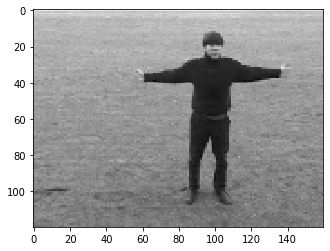

In [5]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import skvideo.io
%matplotlib inline

# The path of a sample video in the training data
sample_files = train_files[:1]

# An object of the class 'Videos'
sample = skvideo.io.vread(sample_files[0]);

print('\nShape of the sample data:', sample.shape)

# Displaying a frame from the sample video
plt.imshow(sample[300])

In [6]:
sec=7
frames_needed=50

In [7]:
import numpy as np
from skvideo.io import FFmpegReader, ffprobe
from skvideo.utils import rgb2gray
from PIL import Image
from keras.preprocessing import image
from tqdm import tqdm
from keras.utils import to_categorical
import cv2
def read_video_bgsub(path,size):


        cap = FFmpegReader(filename=path)
        list_of_frames = []
        fps = int(cap.inputfps)                  # Frame Rate
        
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
        fgbg = cv2.createBackgroundSubtractorMOG2()
        count = 0;
        
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            #print type(temp_image)
            fgmask = fgbg.apply(frame)
            fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
            
            fgmaskimg = Image.fromarray(fgmask)
            
            #print type(fgmask)
            frame = image.img_to_array(
                        fgmaskimg.resize(
                            (size, size),
                            Image.ANTIALIAS)).astype('uint8')
            if index%frame_alternate == 0:
                if count < frames_needed:
                    list_of_frames.append(frame);
                    count= count+1;

        temp_video = np.stack(list_of_frames)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

Using TensorFlow backend.


In [8]:
def read_video_bgsub_flip(path,size):


        cap = FFmpegReader(filename=path)
        #list_of_frames = []
        list_of_frames2 = []
        fps = int(cap.inputfps)                  # Frame Rate
        #T,M,N,C= cap.getShape()
        #frames=int(T)
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
        fgbg = cv2.createBackgroundSubtractorMOG2()
        count = 0;
        
        
#         total_length = frames/fps
#         excess_len = int((total_length-sec)/6)
        
#         excess_frames = excess_len*fps
        
        remove=0
        
            
            
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            #temp_image2= temp_image.transpose(Image.FLIP_LEFT_RIGHT)
            #temp_image3= image.img_to_array(temp_image2)
            #print type(temp_image)
            fgmask = fgbg.apply(frame)
#             fgmask = image.array_to_image(fgmask)
#             
#             fgmask = image.img_to_array(temp_image2)
            fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
            #print("fgmask:",type(fgmask))
            #fgmask = fgmask.transpose(Image.FLIP_LEFT_RIGHT)
            fgmask = np.flip(fgmask,1)
            fgmaskimg = Image.fromarray(fgmask)
            
            #print type(fgmask)
            #frame = image.img_to_array(
            #            fgmaskimg.resize(
            #                (size, size),
            #                Image.ANTIALIAS)).astype('uint8')
            frame2 = image.img_to_array(
                        fgmaskimg.resize(
                            (size, size),
                            Image.ANTIALIAS)).astype('uint8')
            
            #remove+=1
            if index%frame_alternate == 0:
                if count < frames_needed:
                    #list_of_frames.append(frame);
                    list_of_frames2.append(frame2);
                    count= count+1;

        temp_video = np.stack(list_of_frames2)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [9]:
def read_video(path):


        cap = FFmpegReader(filename=path)
        list_of_frames = []
        fps = int(cap.inputfps)                  # Frame Rate
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        count = 0;
        
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            frame = image.img_to_array(
                        temp_image.resize(
                            (35, 35),
                            Image.ANTIALIAS)).astype('uint8')
            if index%frame_alternate == 0:
                if count < frames_needed:
                    list_of_frames.append(frame);
                    count= count+1;

        temp_video = np.stack(list_of_frames)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [10]:
def read_video_flip(path):


        cap = FFmpegReader(filename=path)
        list_of_frames = []
        list_of_frames2 = []
        fps = int(cap.inputfps)                  # Frame Rate
#         T,M,N,C= cap.getShape()
#         frames=int(T)
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        count = 0;
        
#         total_length = frames/fps
#         excess_len = int((total_length-sec)/6)
        
#         excess_frames = excess_len*fps
        
        remove=0
                    
            
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            temp_image2= temp_image.transpose(Image.FLIP_LEFT_RIGHT)
#             frame = image.img_to_array(
#                         temp_image.resize(
#                             (20, 20),
#                             Image.ANTIALIAS)).astype('uint8')
            frame2 = image.img_to_array(
                        temp_image2.resize(
                            (35, 35),
                            Image.ANTIALIAS)).astype('uint8')
#             remove+=1
            if index%frame_alternate == 0:
                if count < frames_needed:
                    #list_of_frames.append(frame);
                    list_of_frames2.append(frame2);
                    count= count+1;

        temp_video = np.stack(list_of_frames2)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [11]:
def read_videos(paths):
 
        list_of_videos = []
        list_of_videos_flip = []
        list_of_videos = [
            read_video(path) for path in tqdm(paths)
        ]
        list_of_videos_flip = [
            read_video_flip(path) for path in tqdm(paths)
        ]

        #print("shape1:", list_of_videos[:].shape)
        list_of_videos+=list_of_videos_flip
        videos = np.vstack(list_of_videos)

        #base = self.normalize_pixels[0]
        #r = self.normalize_pixels[1] - base
        min_ = np.min(videos, axis=(1, 2, 3), keepdims=True)
        max_ = np.max(videos, axis=(1, 2, 3), keepdims=True)
        #return ((videos.astype('float32') - min_) / (max_ - min_)) * r + base
        return ((videos.astype('float32') - min_) / (max_ - min_))


In [12]:
def read_videos_bgsub(paths, size):
     
        #print("shape1:", list_of_videos[:].shape)
        list_of_videos = []
        list_of_videos_flip = []
        list_of_videos = [
            read_video_bgsub(path, size) for path in tqdm(paths)
        ]
        list_of_videos_flip = [
            read_video_bgsub_flip(path, size) for path in tqdm(paths)
        ]
        
        list_of_videos+=list_of_videos_flip
        videos = np.vstack(list_of_videos)

        #base = self.normalize_pixels[0]
        #r = self.normalize_pixels[1] - base
        min_ = np.min(videos, axis=(1, 2, 3), keepdims=True)
        max_ = np.max(videos, axis=(1, 2, 3), keepdims=True)
        #return ((videos.astype('float32') - min_) / (max_ - min_)) * r + base
        return ((videos.astype('float32') - min_) / (max_ - min_))

In [12]:
# Reading training videos and one-hot encoding the training labels
X_train = read_videos(train_files)
y_train = to_categorical(train_targets, num_classes=6)
y_train = np.concatenate((y_train,y_train))
print('Shape of training data:', X_train.shape)
print('Shape of training labels:', y_train.shape)

100%|██████████| 300/300 [02:26<00:00,  2.05it/s]


Shape of training data: (600, 50, 35, 35, 1)
Shape of training labels: (600, 6)


In [13]:
# Reading validation videos and one-hot encoding the validation labels
X_valid = read_videos(valid_files)
y_valid = to_categorical(valid_targets, num_classes=6)

X_train =  np.concatenate((X_train,X_valid[122:]))
y_train = np.concatenate((y_train,y_valid))
X_valid = X_valid[:122]
print('Shape of validation data:', X_valid.shape)
print('Shape of validation labels:', y_valid.shape)
print('Shape of Train data:', X_train.shape)
print('Shape of Train labels:', y_train.shape)

100%|██████████| 122/122 [00:55<00:00,  2.19it/s]


Shape of validation data: (122, 50, 35, 35, 1)
Shape of validation labels: (122, 6)
Shape of Train data: (722, 50, 35, 35, 1)
Shape of Train labels: (722, 6)


In [14]:
# Reading testing videos and one-hot encoding the testing labels
X_test = read_videos(test_files)
y_test = to_categorical(test_targets, num_classes=6)
X_test = X_test[:100]
print('Shape of testing data:', X_test.shape)
print('Shape of testing labels:', y_test.shape)

100%|██████████| 100/100 [00:50<00:00,  1.97it/s]

Shape of testing data: (100, 50, 35, 35, 1)
Shape of testing labels: (100, 6)


In [15]:
#Saving Videos-Without Background Substraction
np.save('X_train.npy',X_train)
np.save('y_train.npy',y_train)
np.save('X_valid.npy',X_valid)
np.save('y_valid.npy',y_valid)
np.save('X_test.npy',X_test)
np.save('y_test.npy',y_test)

In [16]:
X_train_bgsub = read_videos_bgsub(train_files,35)
y_train_bgsub = to_categorical(train_targets, num_classes=6)
y_train_bgsub = np.concatenate((y_train_bgsub,y_train_bgsub))

print('Shape of training data:', X_train_bgsub.shape)
print('Shape of training labels:', y_train_bgsub.shape)

100%|██████████| 300/300 [03:57<00:00,  1.26it/s]


Shape of training data: (600, 50, 35, 35, 1)
Shape of training labels: (600, 6)


In [18]:
X_test_bgsub = read_videos_bgsub(test_files,35)
y_test_bgsub = to_categorical(test_targets, num_classes=6)
X_test_bgsub = X_test_bgsub[:100]
print('Shape of testing data:', X_test_bgsub.shape)
print('Shape of testing labels:', y_test_bgsub.shape)

100%|██████████| 100/100 [01:24<00:00,  1.18it/s]

Shape of testing data: (100, 50, 35, 35, 1)
Shape of testing labels: (100, 6)


In [19]:
X_valid_bgsub = read_videos_bgsub(valid_files,35)
y_valid_bgsub = to_categorical(valid_targets, num_classes=6)

X_train_bgsub =  np.concatenate((X_train_bgsub,X_valid_bgsub[122:]))
y_train_bgsub = np.concatenate((y_train_bgsub,y_valid_bgsub))
X_valid_bgsub = X_valid_bgsub[:122]
print('Shape of validation data:', X_valid_bgsub.shape)
print('Shape of validation labels:', y_valid_bgsub.shape)

100%|██████████| 122/122 [01:37<00:00,  1.25it/s]

Shape of validation data: (122, 50, 35, 35, 1)
Shape of validation labels: (122, 6)


In [20]:
#Saving Videos-With Background Substraction
np.save('X_train_bgsub.npy',X_train_bgsub)
np.save('y_train_bgsub.npy',y_train_bgsub)
np.save('X_test_bgsub.npy',X_test_bgsub)
np.save('y_test_bgsub.npy',y_test_bgsub)
np.save('X_valid_bgsub.npy',X_valid_bgsub)
np.save('y_valid_bgsub.npy',y_valid_bgsub)

100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


Shape of validation data: (20, 50, 35, 35, 1)
Shape of validation labels: (20, 50, 20, 20, 1)
['/media/glacyx/Projects/Private/Projects/Behaviour Tracking/Working/Data/boxing/person06_boxing_d3_uncomp.avi'
 '/media/glacyx/Projects/Private/Projects/Behaviour Tracking/Working/Data/running/person16_running_d1_uncomp.avi'
 '/media/glacyx/Projects/Private/Projects/Behaviour Tracking/Working/Data/jogging/person07_jogging_d4_uncomp.avi'
 '/media/glacyx/Projects/Private/Projects/Behaviour Tracking/Working/Data/jogging/person06_jogging_d1_uncomp.avi'
 '/media/glacyx/Projects/Private/Projects/Behaviour Tracking/Working/Data/boxing/person07_boxing_d3_uncomp.avi'
 '/media/glacyx/Projects/Private/Projects/Behaviour Tracking/Working/Data/walking/person25_walking_d1_uncomp.avi'
 '/media/glacyx/Projects/Private/Projects/Behaviour Tracking/Working/Data/walking/person23_walking_d2_uncomp.avi'
 '/media/glacyx/Projects/Private/Projects/Behaviour Tracking/Working/Data/boxing/person11_boxing_d4_uncomp.avi'


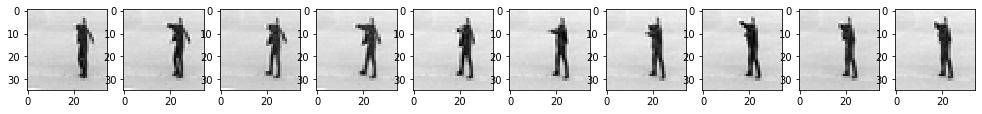

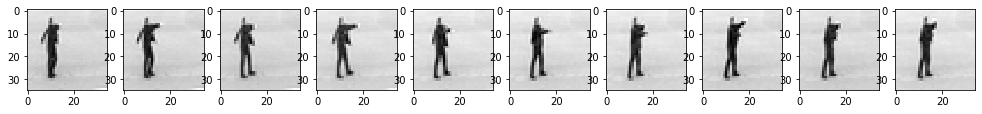

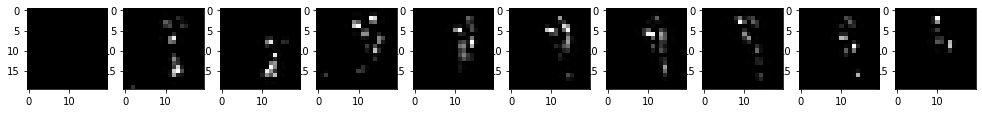

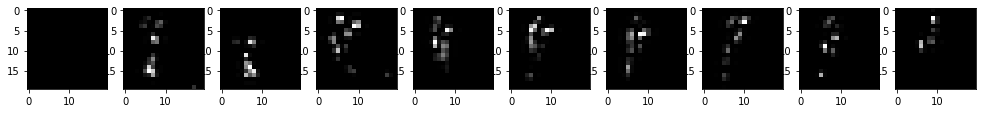

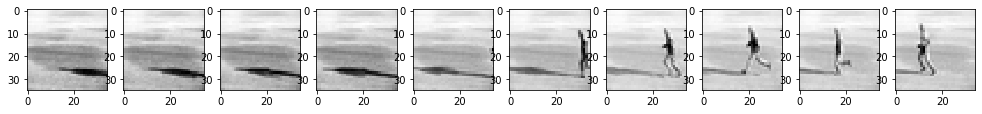

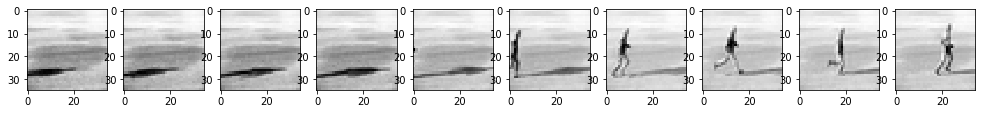

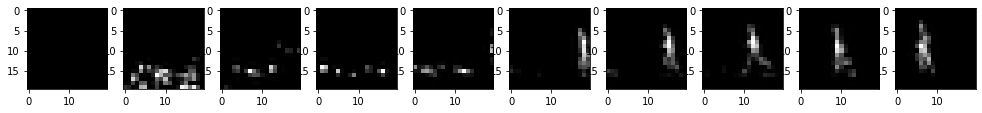

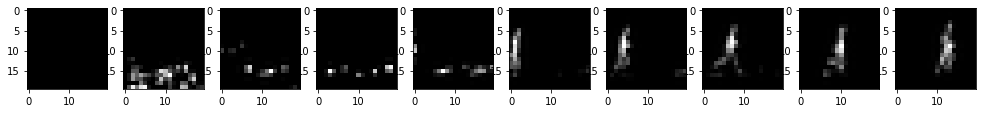

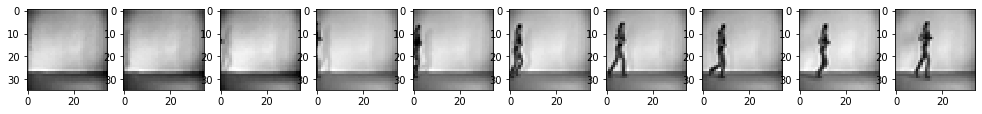

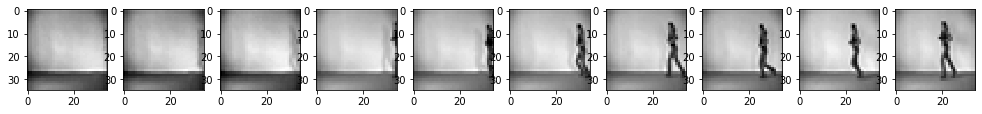

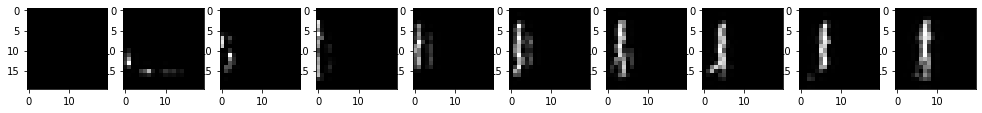

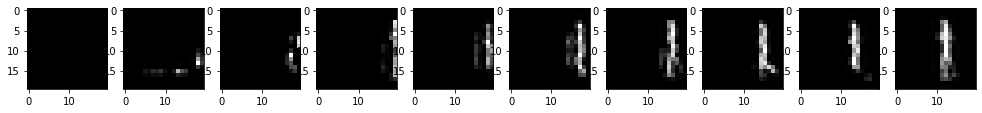

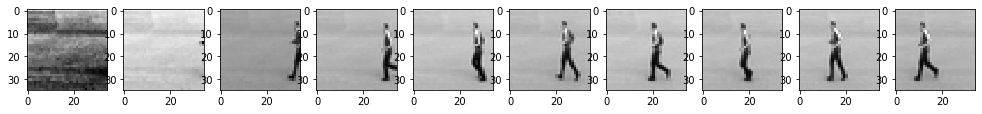

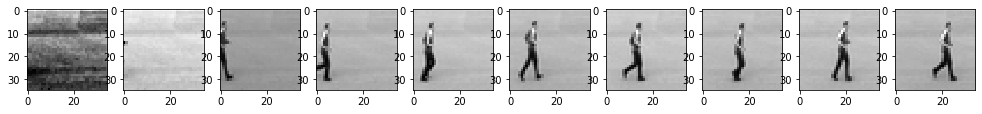

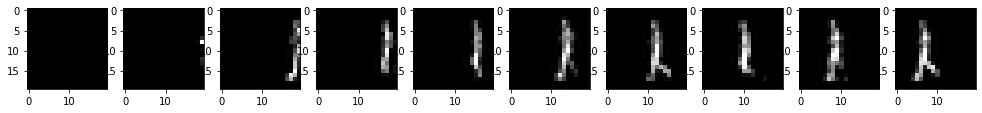

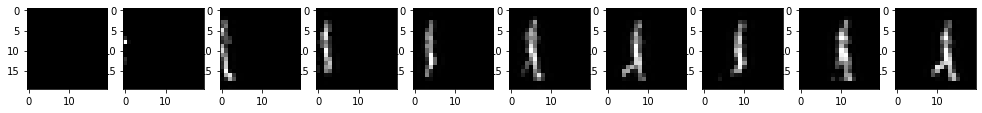

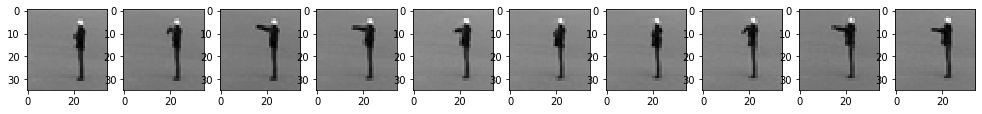

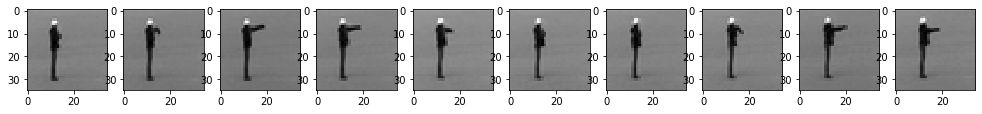

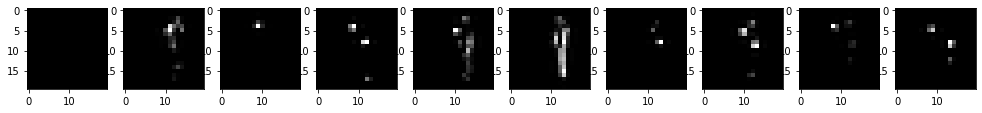

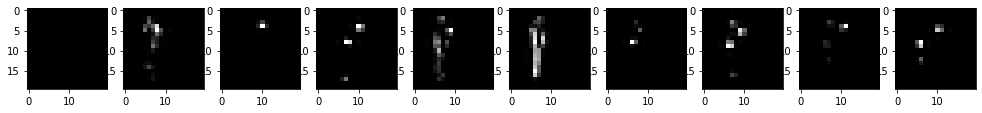

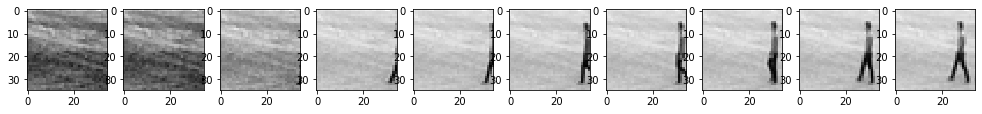

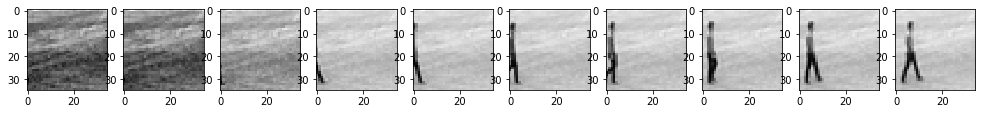

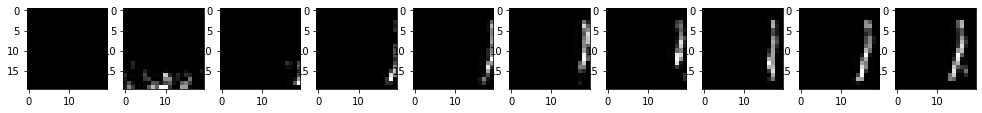

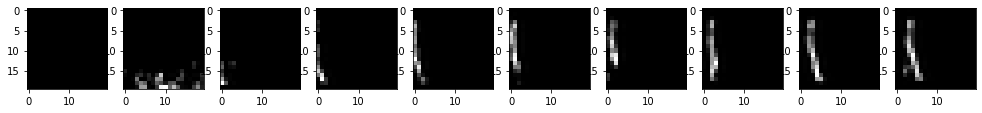

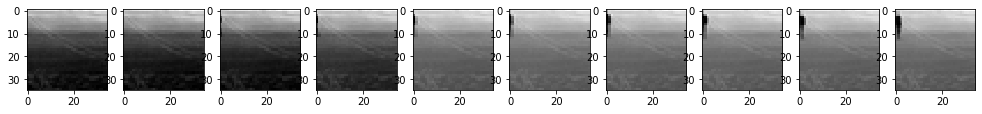

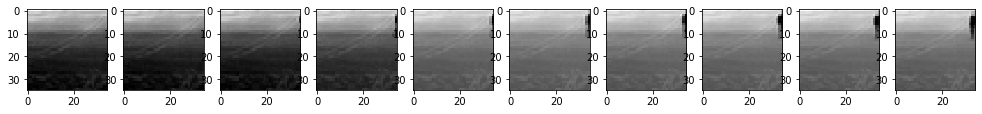

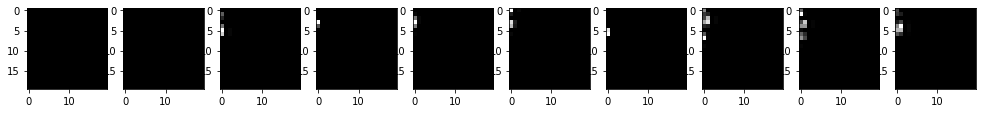

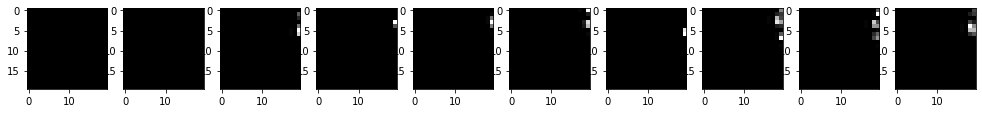

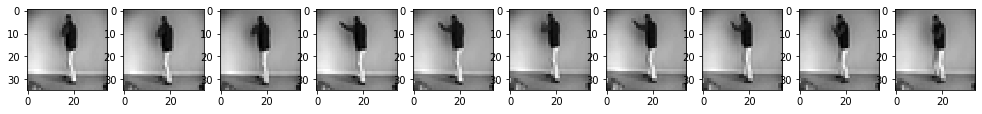

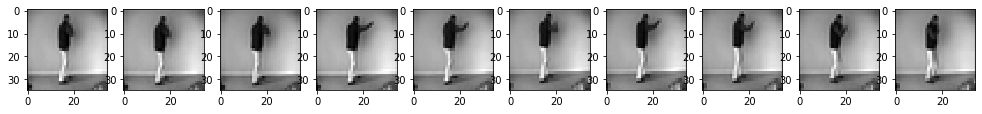

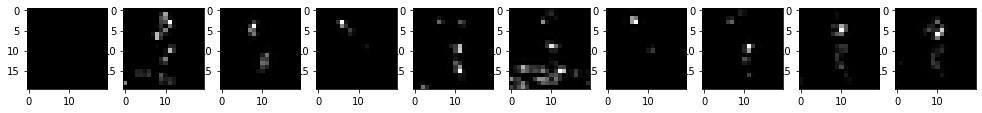

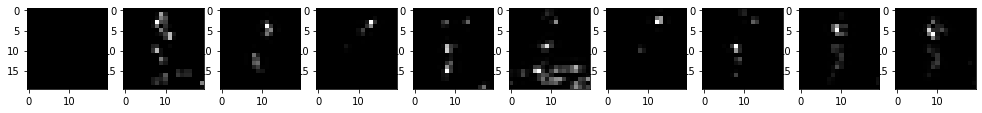

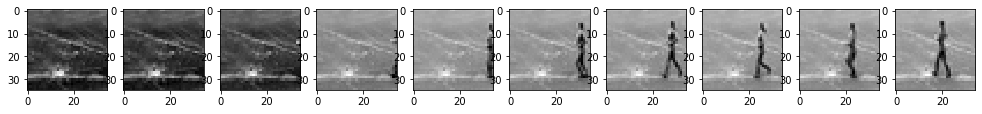

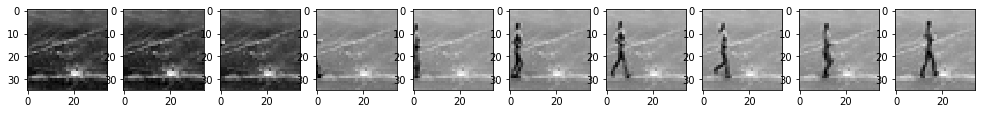

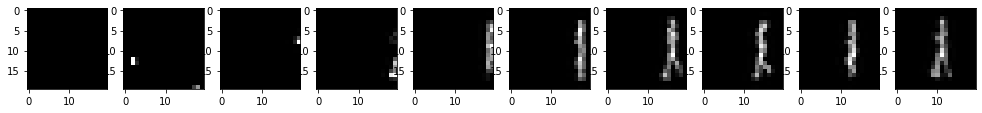

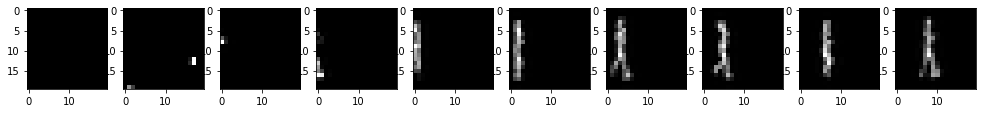

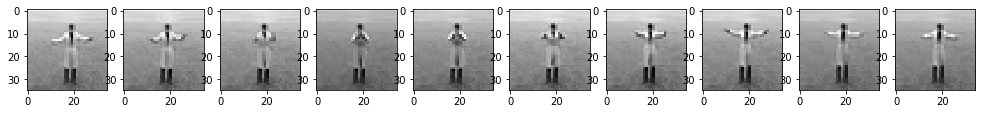

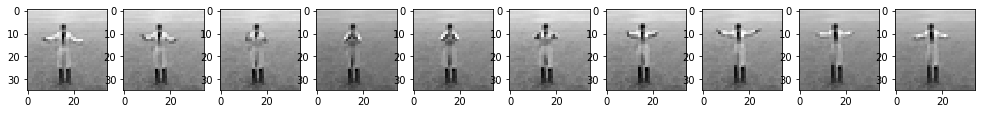

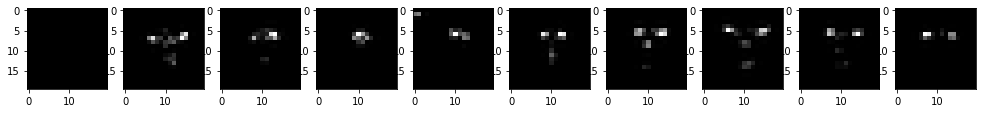

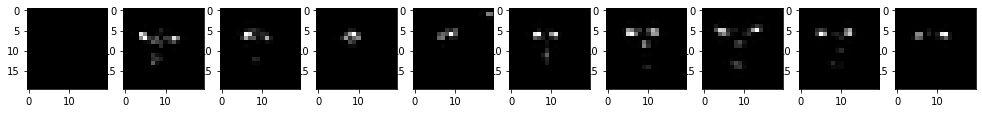

In [13]:
X_sample = read_videos(train_files[20:30])
X_sample_bgsub = read_videos_bgsub(train_files[20:30],20)

print('Shape of validation data:', X_sample.shape)
print('Shape of validation labels:', X_sample_bgsub.shape)
print(train_files[20:50])

from PIL import Image

for j in range(10):
    fig, axes = plt.subplots(1, 10,figsize=(17, 10))
    i=0;


    for frames in X_sample[j][:10]:
    #plt.imshow(frames[0])
            axes[i].imshow(np.squeeze(frames, axis=2), cmap='gray')
            i=i+1;
            #plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

    fig2, axes2 = plt.subplots(1, 10,figsize=(17, 10))
    i=0;
    for frames in X_sample[j+10][:10]:
    #plt.imshow(frames[0])
            axes2[i].imshow(np.squeeze(frames, axis=2), cmap='gray')
            i=i+1;
            #plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    
   
    fig3, axes3 = plt.subplots(1, 10,figsize=(17, 10))
    i=0;
    for frames in X_sample_bgsub[j][:10]:
    #plt.imshow(frames[0])
            axes3[i].imshow(np.squeeze(frames, axis=2), cmap='gray')
            i=i+1;
            #plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    
    fig4, axes4 = plt.subplots(1, 10,figsize=(17, 10))
    i=0;
    for frames in X_sample_bgsub[j+10][:10]:
    #plt.imshow(frames[0])
            axes4[i].imshow(np.squeeze(frames, axis=2), cmap='gray')
            i=i+1;
            #plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()